<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [33]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
df = pd.read_csv('asset_price_data.csv')
hard_copy = df.copy()
print(df.head(5))
print(df.shape)

         date    Asset1  Asset2     Asset3  Asset4  Asset5
0  2019-01-02  231.5061  55.875  25.649222  302.93   50.89
1  2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2  2019-01-04  230.4026  56.129  26.147133  301.77   51.38
3  2019-01-07  230.0543  56.838  25.955277  302.33   52.14
4  2019-01-08  229.7012  56.895  26.137997  303.42   52.13
(783, 6)


<Axes: >

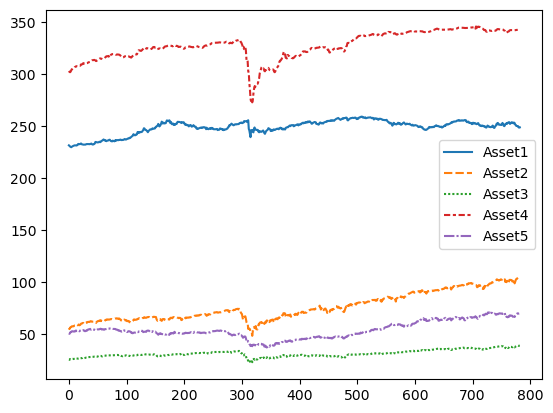

In [3]:
sns.lineplot(data=df)

In [4]:
df.set_index('date', inplace=True)

<Axes: title={'center': 'timeseries analysis'}, xlabel='date'>

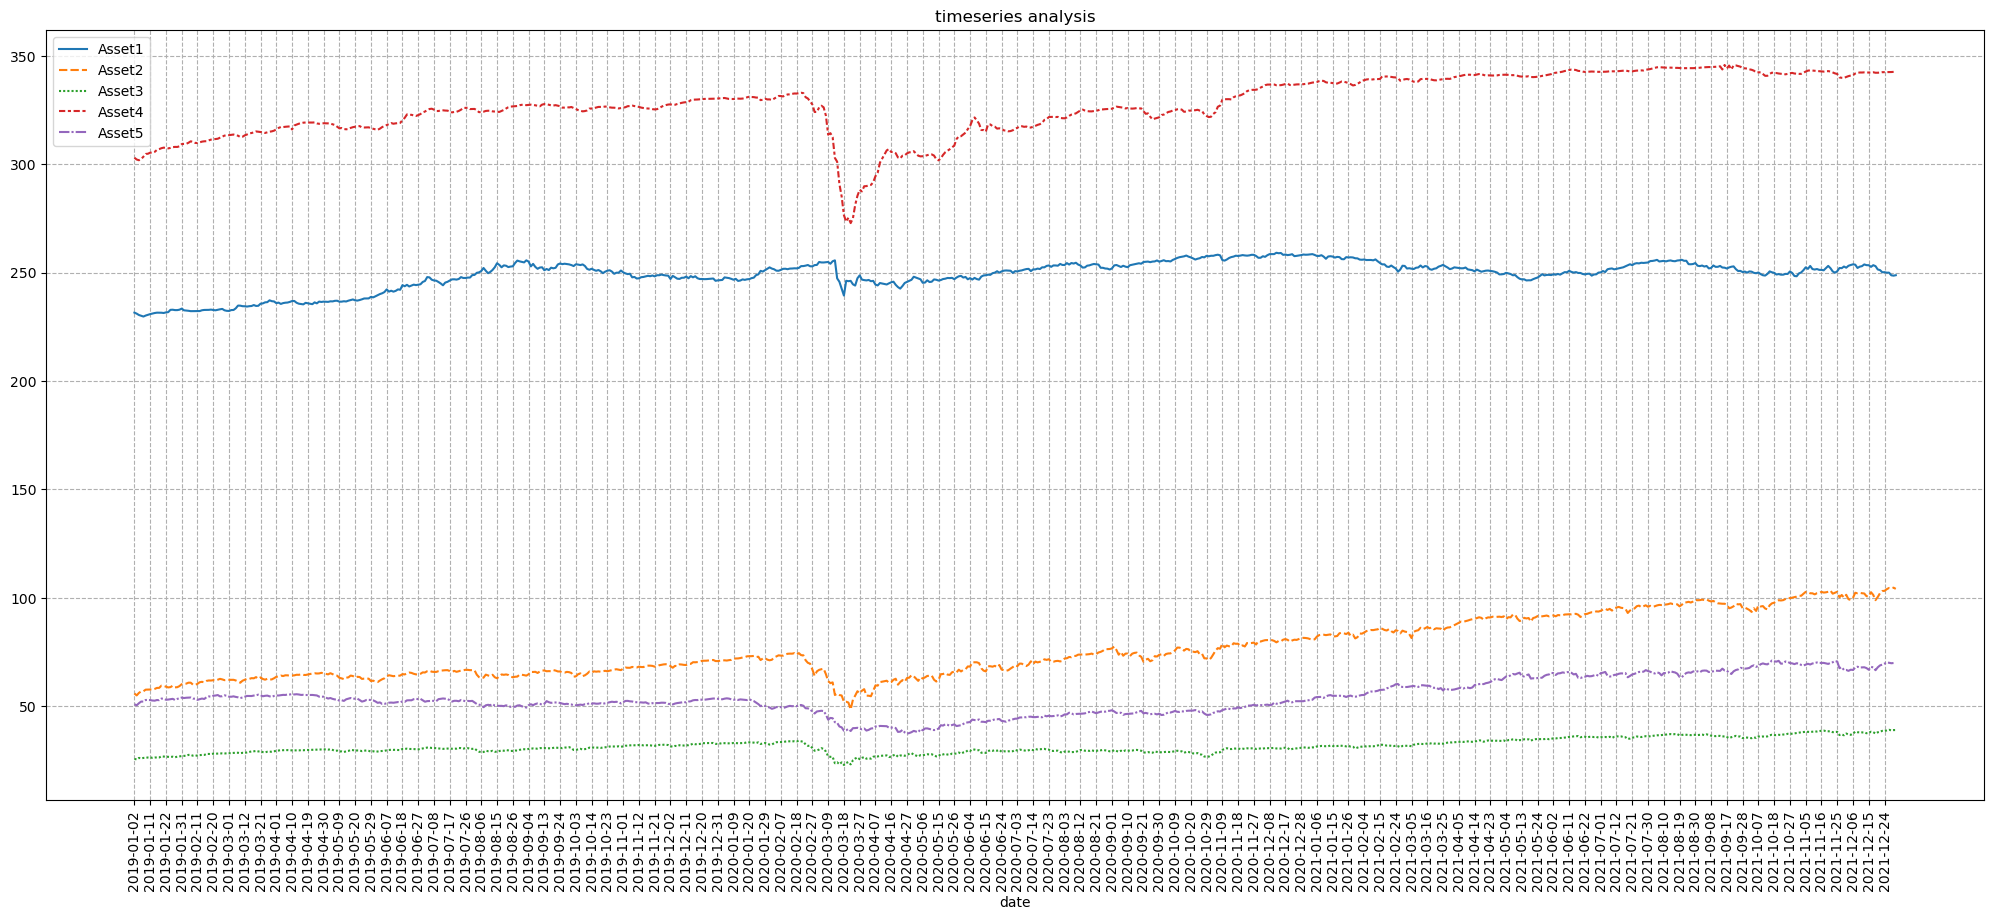

In [5]:
plt.figure(figsize=(25,10))
plt.title("timeseries analysis")
plt.xlabel('date')
plt.grid(linestyle='--')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df.index), 7))
sns.lineplot(data=df)

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Axes: xlabel='date'>

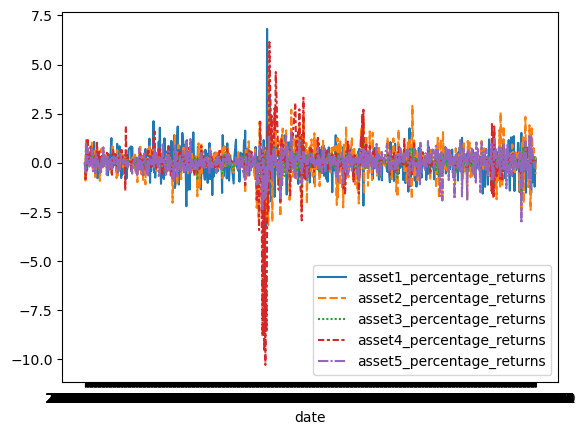

In [54]:
daily = list()
daily_df = pd.DataFrame()
daily_df['date'] = df.index
asset_list = ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']
for asset in asset_list:
    for i in range(len(df.index)):
        if i == 0:
            daily.append(0)
        else:
            daily.append(df.iloc[i][asset] - df.iloc[i-1][asset])
    daily_df[f"{asset.lower()}_percentage_returns"] = daily
    daily.clear()
    
daily_df.set_index('date', inplace=True)

sns.lineplot(data=daily_df)

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Axes: >

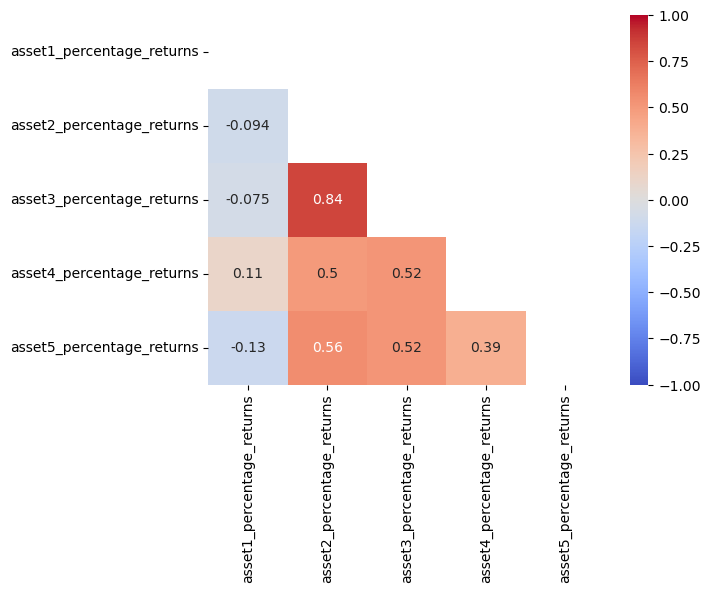

In [14]:
corr_matrix = daily_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',vmax=1, vmin=-1)

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

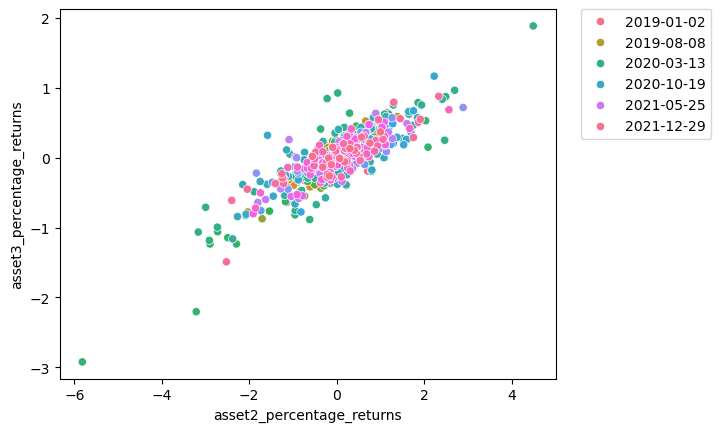

In [20]:
sns.scatterplot(data=daily_df, x='asset2_percentage_returns', y='asset3_percentage_returns', hue='date')

# Get unique dates and choose a subset for the legend
unique_dates = daily_df.index.unique()
selected_dates = unique_dates[::len(unique_dates)//5]  # Select every nth date, adjust the divisor for fewer/more labels

# Create custom legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in range(len(labels)) if labels[i] in selected_dates],
           [label for label in labels if label in selected_dates], 
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [9]:
w_df = pd.read_csv('portfolio_weights.csv')
w_df.set_index('date', inplace=True)
print(w_df.head(5))
print(w_df.shape)

              Asset1    Asset2    Asset3   Asset4    Asset5
date                                                       
2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974
(783, 5)


In [118]:
aid_df = pd.read_csv('asset_information_data.csv')
print(aid_df.head(5))
print(aid_df.shape)

     Name        Family
0  Asset1  Fixed Income
1  Asset2  Fixed Income
2  Asset3        Equity
3  Asset4        Equity
4  Asset5   Alternative
(5, 2)


<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

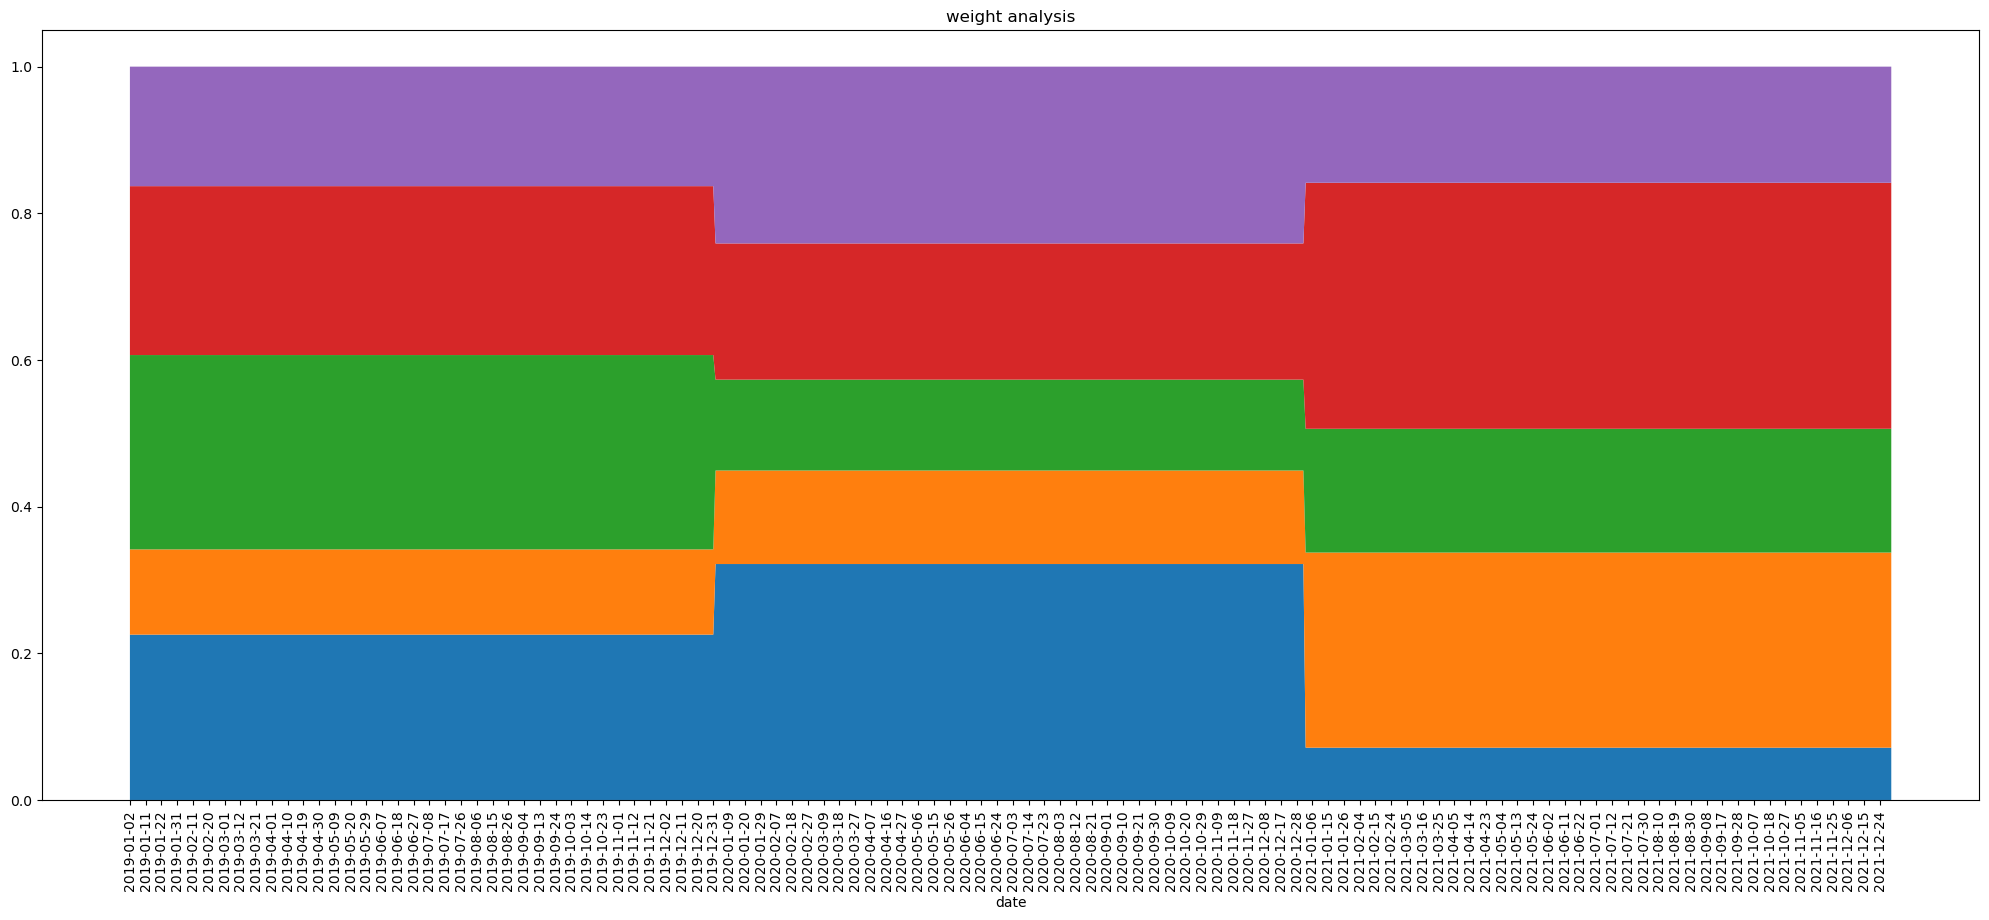

In [11]:
plt.figure(figsize=(25,10))
plt.title("weight analysis")
plt.xlabel('date')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df.index), 7))
plt.stackplot(w_df.index, w_df.iloc[:,0], w_df.iloc[:,1], w_df.iloc[:,2], w_df.iloc[:,3], w_df.iloc[:,4])

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

           date  total_value  comulative_returns
0    2019-01-02   143.549208            0.000000
1    2019-01-03   143.032914           -0.003597
2    2019-01-04   143.274590           -0.001913
3    2019-01-07   143.480479           -0.000479
4    2019-01-08   143.705325            0.001088
..          ...          ...                 ...
778  2021-12-27          NaN                 NaN
779  2021-12-28          NaN                 NaN
780  2021-12-29   178.002543            0.240011
781  2021-12-30   178.138801            0.240960
782  2021-12-31          NaN                 NaN

[783 rows x 3 columns]


<Axes: ylabel='comulative_returns'>

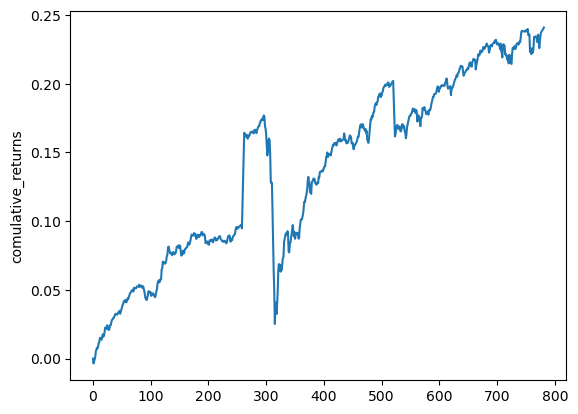

In [23]:
returns_df = pd.DataFrame()

returns_df["date"] = hard_copy.date
total_value = list()
comulative_returns = list()

for i in range(len(df.index)):
    line_total = 0
    line_comulative = 0
    for asset in asset_list:
        # current value is given by the sum of all (assets * assets weight)
        line_total += df.iloc[i][asset]*w_df.iloc[i][asset]    
        # comulative is given by current value / initial value - 1
    
    total_value.append(line_total)
    line_comulative += line_total / total_value[0] -1
    
    comulative_returns.append(line_comulative)

returns_df["total_value"] = total_value
returns_df["comulative_returns"] = comulative_returns
print(returns_df)
sns.lineplot(data=returns_df.comulative_returns)

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [58]:
# Overall annualized return:
ov_df = returns_df.dropna()

comm_ret = ov_df["comulative_returns"].iloc[-1].astype(float)
print(comm_ret)
n = 3 # number of years

ov_ann_ret = 100*((1 + comm_ret) ** (1/n) - 1)

print(f"{ov_ann_ret:.3f} %")



0.2409598376385802
7.461 %


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [62]:
daily_ret = list()

for i in range(len(ov_df.index)):
    if i == 0:
        daily_ret.append(0.0)
    else:
        daily_ret.append((ov_df["total_value"].iloc[i] - ov_df["total_value"].iloc[i-1])/ov_df["total_value"].iloc[i-1])

daily_volatility = np.std(daily_ret)

annualized_volatility = daily_volatility * np.sqrt(261) *100

print(f"{annualized_volatility:.3f} %")



6.287 %


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [119]:
print(aid_df)
print(w_df.head(1))

     Name        Family
0  Asset1  Fixed Income
1  Asset2  Fixed Income
2  Asset3        Equity
3  Asset4        Equity
4  Asset5   Alternative
              Asset1    Asset2    Asset3   Asset4    Asset5
date                                                       
2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974


In [192]:
group_w_df = pd.DataFrame(columns=["date",]+ list(aid_df.Family.unique()))
group_w_df["date"] = w_df.index
group_w_df.set_index("date", inplace=True)
print(group_w_df)



           Fixed Income Equity Alternative
date                                      
2019-01-02          NaN    NaN         NaN
2019-01-03          NaN    NaN         NaN
2019-01-04          NaN    NaN         NaN
2019-01-07          NaN    NaN         NaN
2019-01-08          NaN    NaN         NaN
...                 ...    ...         ...
2021-12-27          NaN    NaN         NaN
2021-12-28          NaN    NaN         NaN
2021-12-29          NaN    NaN         NaN
2021-12-30          NaN    NaN         NaN
2021-12-31          NaN    NaN         NaN

[783 rows x 3 columns]


In [183]:
print(aid_df.Name.values)

['Asset1' 'Asset2' 'Asset3' 'Asset4' 'Asset5']


In [193]:
for date in w_df.index:
    for name,fam in list(zip(aid_df['Name'], aid_df['Family'])):
        if pd.isna(group_w_df.loc[date, fam]):
            group_w_df.loc[date, fam] = w_df.loc[date, name].astype(float)
        else:
            group_w_df.loc[date, fam] += w_df.loc[date, name].astype(float)
        
            
group_w_df.dropna(inplace=True)
            

In [194]:
print(group_w_df)

for fam in group_w_df.columns:
    group_w_df[fam] = group_w_df[fam].astype(float)
    
print(group_w_df.dtypes)

           Fixed Income    Equity Alternative
date                                         
2019-01-02     0.341713  0.495313    0.162974
2019-01-03     0.341713  0.495313    0.162974
2019-01-04     0.341713  0.495313    0.162974
2019-01-07     0.341713  0.495313    0.162974
2019-01-08     0.341713  0.495313    0.162974
...                 ...       ...         ...
2021-12-27       0.3374  0.504245    0.158356
2021-12-28       0.3374  0.504245    0.158356
2021-12-29       0.3374  0.504245    0.158356
2021-12-30       0.3374  0.504245    0.158356
2021-12-31       0.3374  0.504245    0.158356

[783 rows x 3 columns]
Fixed Income    float64
Equity          float64
Alternative     float64
dtype: object


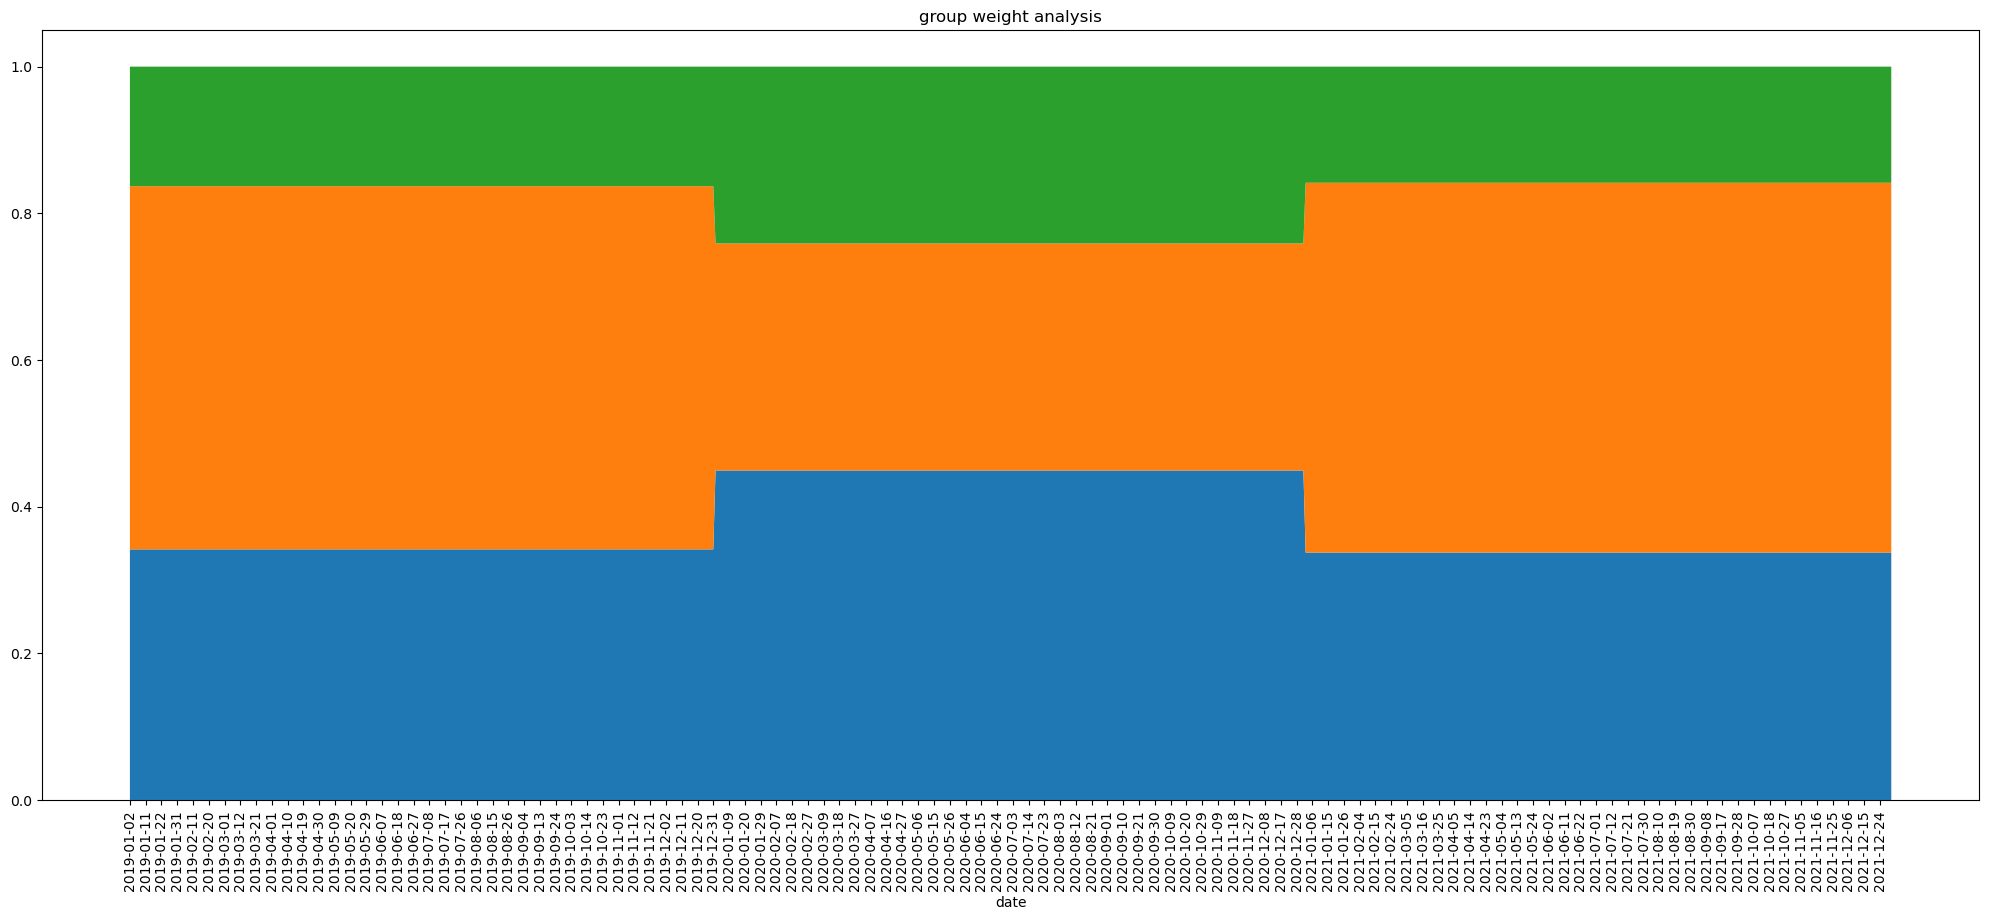

In [195]:
plt.figure(figsize=(25,10))
plt.title("group weight analysis")
plt.xlabel('date')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(group_w_df.index), 7))
plt.stackplot(group_w_df.index, group_w_df.iloc[:,0], group_w_df.iloc[:,1], group_w_df.iloc[:,2])
plt.show()